Google Colab Link
https://colab.research.google.com/drive/1Xa4y_ZjjdHWTDdKURK8B0q9jYhfOe8bi?usp=sharing

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
# Mount file to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/2178/INF2178_A1_data.xlsx',sheet_name='data')

In [5]:
df.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [6]:
#checking data types
data_types = df.dtypes
data_types

OCCUPANCY_DATE            datetime64[ns]
ORGANIZATION_NAME                 object
PROGRAM_ID                         int64
PROGRAM_NAME                      object
SECTOR                            object
PROGRAM_MODEL                     object
OVERNIGHT_SERVICE_TYPE            object
PROGRAM_AREA                      object
SERVICE_USER_COUNT                 int64
CAPACITY_TYPE                     object
CAPACITY_ACTUAL_BED              float64
OCCUPIED_BEDS                    float64
CAPACITY_ACTUAL_ROOM             float64
OCCUPIED_ROOMS                   float64
dtype: object

In [7]:
# Checking for missing values in the specified key columns
key_columns = ['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT',
               'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
               'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

missing_values_key_columns = df[key_columns].isnull().sum()
missing_values_key_columns

CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64

In [8]:
#checking data shape
df.shape

(50944, 14)

In [9]:
#drop 2 missing value under program model
df1 = df.dropna(subset=['PROGRAM_MODEL'])

In [10]:
#verify if missing value has been dropped
df1.shape

(50942, 14)

In [11]:
#Check program model distribution
df1["PROGRAM_MODEL"].value_counts()

Emergency       41541
Transitional     9401
Name: PROGRAM_MODEL, dtype: int64

<ipython-input-12-efb6fb4dd04f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df1,palette='muted')


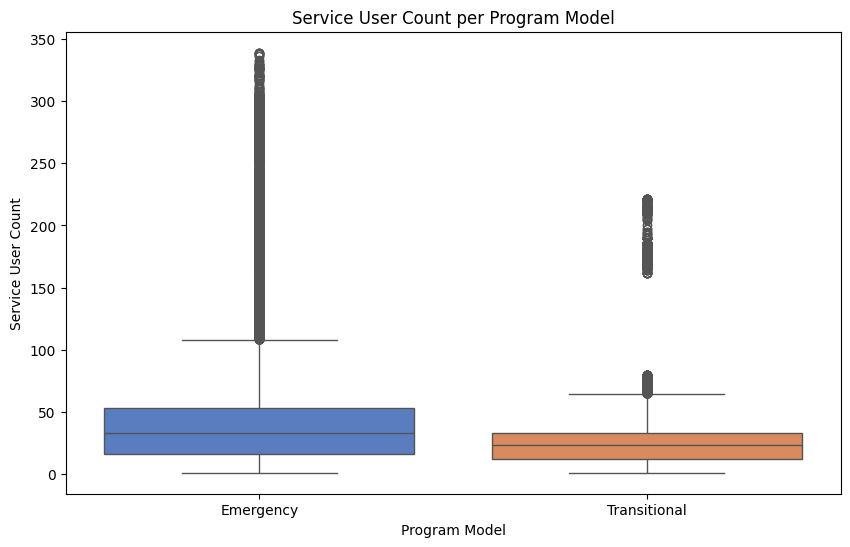

In [12]:
# Creating a boxplot for SERVICE_USER_COUNT per PROGRAM_MODEL
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df1,palette='muted')

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

plt.title('Service User Count per Program Model')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()


In [13]:
#checking capacity type distribution
df1["CAPACITY_TYPE"].value_counts()

Bed Based Capacity     32397
Room Based Capacity    18545
Name: CAPACITY_TYPE, dtype: int64

<ipython-input-14-d0d568c86eff>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df1, ax=ax,palette='Set2')


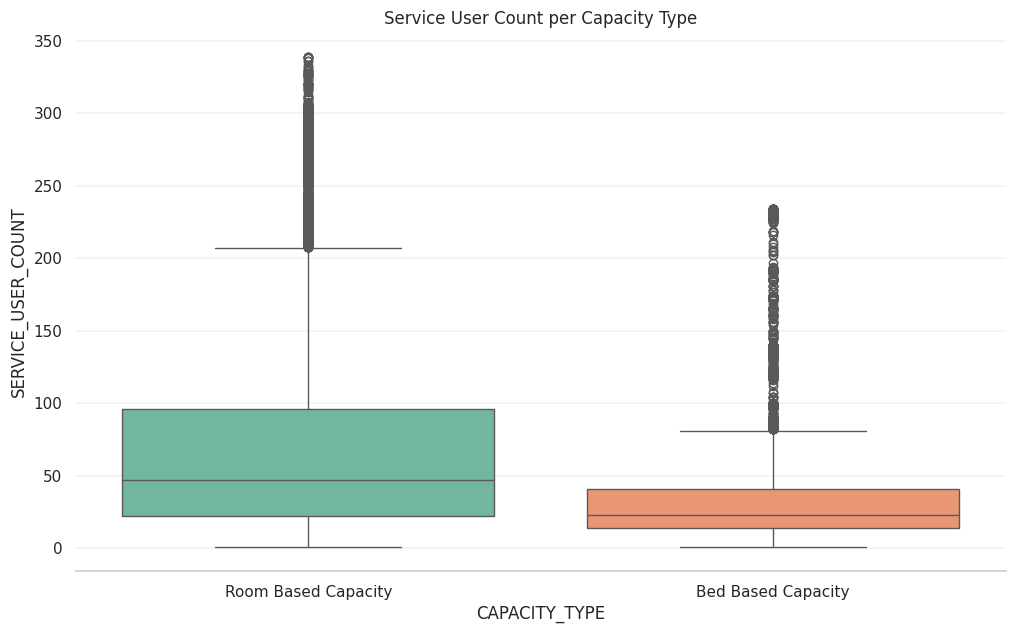

In [14]:
# creating a boxplot for Service User Count per Capacity Type
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Service User Count per Capacity Type')

# Creating the boxplot for SERVICE_USER_COUNT per PROGRAM_MODEL with seaborn to leverage its advanced plotting capabilities
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df1, ax=ax,palette='Set2')

# Show the plot
plt.show()


In [15]:
# Calculate occupancy rates for both Room and Bed based capacities
# Occupancy rate is calculated as the number of occupied units divided by the actual number of units available
df1['ROOM_OCCUPANCY_RATE'] = df1['OCCUPIED_ROOMS'] / df1['CAPACITY_ACTUAL_ROOM']
df1['BED_OCCUPANCY_RATE'] = df1['OCCUPIED_BEDS'] / df1['CAPACITY_ACTUAL_BED']

# We'll group the data by PROGRAM_MODEL and calculate the average occupancy rates for each
occupancy_rates_by_program_model = df1.groupby('PROGRAM_MODEL')[['ROOM_OCCUPANCY_RATE', 'BED_OCCUPANCY_RATE']].mean().reset_index()

occupancy_rates_by_program_model


<ipython-input-15-49512371c551>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ROOM_OCCUPANCY_RATE'] = df1['OCCUPIED_ROOMS'] / df1['CAPACITY_ACTUAL_ROOM']
<ipython-input-15-49512371c551>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BED_OCCUPANCY_RATE'] = df1['OCCUPIED_BEDS'] / df1['CAPACITY_ACTUAL_BED']


,PROGRAM_MODEL,ROOM_OCCUPANCY_RATE,BED_OCCUPANCY_RATE
0,Emergency,0.938630,0.943501
1,Transitional,0.823207,0.885194


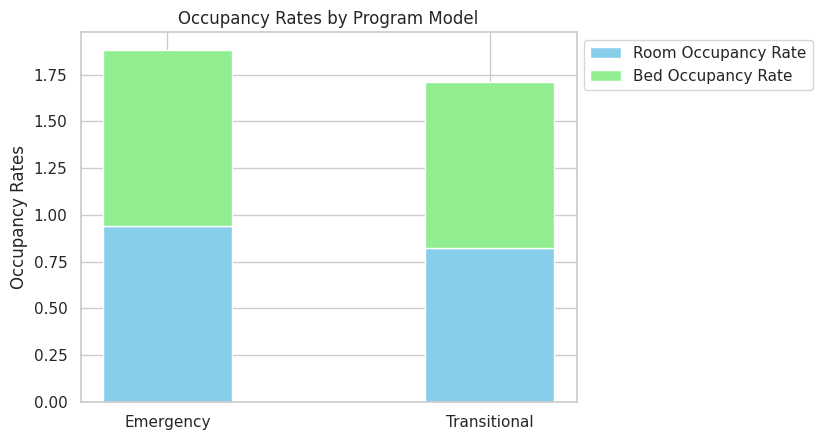

In [16]:
# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Define the x-axis for the bar positions
ind = range(len(occupancy_rates_by_program_model))

# Bar width
width = 0.4

# Plot the Room Occupancy Rate
ax.bar(ind, occupancy_rates_by_program_model['ROOM_OCCUPANCY_RATE'], width, label='Room Occupancy Rate', color='skyblue')

# Plot the Bed Occupancy Rate on top of the Room Occupancy Rate
ax.bar(ind, occupancy_rates_by_program_model['BED_OCCUPANCY_RATE'], width,
       bottom=occupancy_rates_by_program_model['ROOM_OCCUPANCY_RATE'], label='Bed Occupancy Rate', color='lightgreen')

# Set the labels and title
ax.set_ylabel('Occupancy Rates')
ax.set_title('Occupancy Rates by Program Model')
ax.set_xticks(ind)
ax.set_xticklabels(occupancy_rates_by_program_model['PROGRAM_MODEL'])
ax.legend()

# Moving the legend to outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Filter the SERVICE_USER_COUNT data for each PROGRAM_MODEL category in df1
emergency_service_user_count = df1[df1['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_service_user_count = df1[df1['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

# Perform an independent samples t-test between the service user counts of Emergency and Transitional program models
t_stat_service_count, p_value_service_count = ttest_ind(
    emergency_service_user_count.dropna(),
    transitional_service_user_count.dropna(),
    equal_var=False
)

# Output the results
print(f"T-statistic: {t_stat_service_count}, P-value: {p_value_service_count:.5f}")



T-statistic: 38.85174699254652, P-value: 0.00000


In [21]:

# Filter the ROOM_OCCUPANCY_RATE data for each PROGRAM_MODEL category
emergency_room_occupancy_rate = df1[df1['PROGRAM_MODEL'] == 'Emergency']['ROOM_OCCUPANCY_RATE']
transitional_room_occupancy_rate = df1[df1['PROGRAM_MODEL'] == 'Transitional']['ROOM_OCCUPANCY_RATE']

# Perform an independent samples t-test between the room occupancy rates of Emergency and Transitional program models
t_stat_room_occupancy, p_value_room_occupancy = ttest_ind(
    emergency_room_occupancy_rate.dropna(),
    transitional_room_occupancy_rate.dropna(),
    equal_var=False
)

# Output the results
print(f"T-statistic: {t_stat_room_occupancy}, P-value: {p_value_room_occupancy:.5f}")


T-statistic: 31.71080126309493, P-value: 0.00000


<ipython-input-25-de52a03be7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MONTH'] = df1['OCCUPANCY_DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

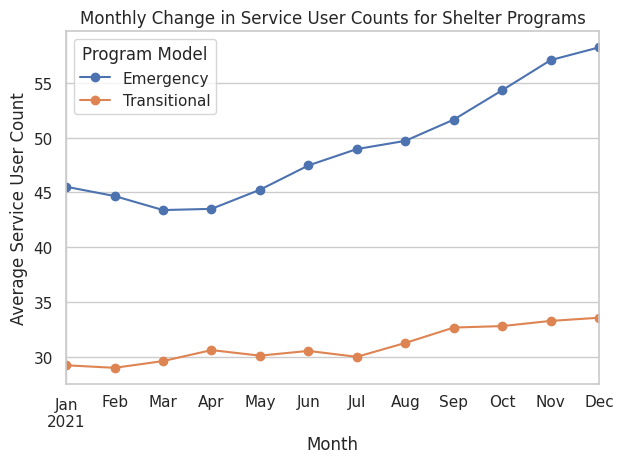

In [25]:
#Visualize the overall change in service user counts for both Emergency and Transitional shelters across different months
df1['MONTH'] = df1['OCCUPANCY_DATE'].dt.to_period('M')

# Grouping by 'MONTH' and 'PROGRAM_MODEL' and calculating the mean
monthly_occupancy = df1.groupby(['MONTH', 'PROGRAM_MODEL'])['SERVICE_USER_COUNT'].mean().reset_index()

# Pivot the data for plotting
monthly_occupancy_pivot = monthly_occupancy.pivot(index='MONTH', columns='PROGRAM_MODEL', values='SERVICE_USER_COUNT')

# Plotting
plt.figure(figsize=(12, 6))
monthly_occupancy_pivot.plot(kind='line', marker='o')
plt.title('Monthly Change in Service User Counts for Shelter Programs')
plt.xlabel('Month')
plt.ylabel('Average Service User Count')
plt.legend(title='Program Model')
plt.tight_layout()
plt.show()
